**Installing Libraries!!!**

In [78]:
# Python libraries not installed by default in Google Colab
!pip install geopandas
!pip install contextily
!pip install netCDF4
!pip install requests

Importing Libraries!!

In [79]:
from netCDF4 import Dataset
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import xarray as xr

Extracting data for each variable:

*   I have used TerraClimate dataset of monthly climate. These data provide important inputs for ecological and hydrological studies at global scales that require high spatial resolution and time-varying data.The data cover the period from 1958-2020.

In [80]:
precip_path = "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_terraclimate_ppt_1958_CurrentYear_GLOBE.nc"
tmax_path= "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_terraclimate_tmax_1958_CurrentYear_GLOBE.nc"
tmin_path="http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_terraclimate_tmin_1958_CurrentYear_GLOBE.nc"
soil_path="http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_terraclimate_soil_1958_CurrentYear_GLOBE.nc"
winds_path="http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_terraclimate_ws_1958_CurrentYear_GLOBE.nc"

In [81]:
# Reads the NetCDF
precip = xr.open_dataset(precip_path)
tmax = xr.open_dataset(tmax_path)
tmin = xr.open_dataset(tmin_path)
soil_moist = xr.open_dataset(soil_path)
wind_speed = xr.open_dataset(winds_path)

Printing data for visualization and for cleaning purpose.
*   The data was already cleaned, they have mentioned in the website.





In [82]:
print(precip)

<xarray.Dataset>
Dimensions:  (lat: 4320, crs: 1, lon: 8640, time: 780)
Coordinates:
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * crs      (crs) int16 3
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2022-12-01
Data variables:
    ppt      (time, lat, lon) float64 ...
Attributes:
    method:   These layers from TerraClimate were creating using climatically...


In [83]:
print(tmax)

<xarray.Dataset>
Dimensions:  (crs: 1, lon: 8640, lat: 4320, time: 780)
Coordinates:
  * crs      (crs) int16 3
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2022-12-01
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes: (12/49)
    method:                          These layers from TerraClimate were crea...
    title:                           TerraClimate: monthly climate and climat...
    summary:                         This archive contains a dataset of high-...
    keywords:                        WORLDCLIM,global,monthly, temperature,pr...
    id:                              Blank
    naming_authority:                edu.uidaho.nkn
    ...                              ...
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    Up
    references:                      Ab

In [84]:
print(tmin)

<xarray.Dataset>
Dimensions:  (crs: 1, lon: 8640, lat: 4320, time: 780)
Coordinates:
  * crs      (crs) int16 3
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2022-12-01
Data variables:
    tmin     (time, lat, lon) float32 ...
Attributes: (12/49)
    method:                          These layers from TerraClimate were crea...
    title:                           TerraClimate: monthly climate and climat...
    summary:                         This archive contains a dataset of high-...
    keywords:                        WORLDCLIM,global,monthly, temperature,pr...
    id:                              Blank
    naming_authority:                edu.uidaho.nkn
    ...                              ...
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    Up
    references:                      Ab

In [85]:
print(soil_moist)

<xarray.Dataset>
Dimensions:  (lat: 4320, crs: 1, lon: 8640, time: 780)
Coordinates:
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * crs      (crs) int16 3
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2022-12-01
Data variables:
    soil     (time, lat, lon) float32 ...
Attributes:
    method:   These layers from TerraClimate were derived from the essential ...


In [86]:
print(wind_speed)

<xarray.Dataset>
Dimensions:  (lat: 4320, crs: 1, lon: 8640, time: 780)
Coordinates:
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * crs      (crs) int16 3
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2022-12-01
Data variables:
    ws       (time, lat, lon) float32 ...
Attributes:
    method:   These layers from TerraClimate were creating using climatically...


In [87]:
# Latitude and Longitude for Corpus Christi
corpus_christi_lat = 27.8006
corpus_christi_lon = -97.3964

# Latitude and Longitude for New York
new_york_lat = 40.7128
new_york_lon = -74.0060

# Latitude and Longitude for Ahmedabad
ahmedabad_lat = 23.0225
ahmedabad_lon = 72.5714

# Latitude and Longitude for Seoul
seoul_lat = 37.5665
seoul_lon = 126.9780

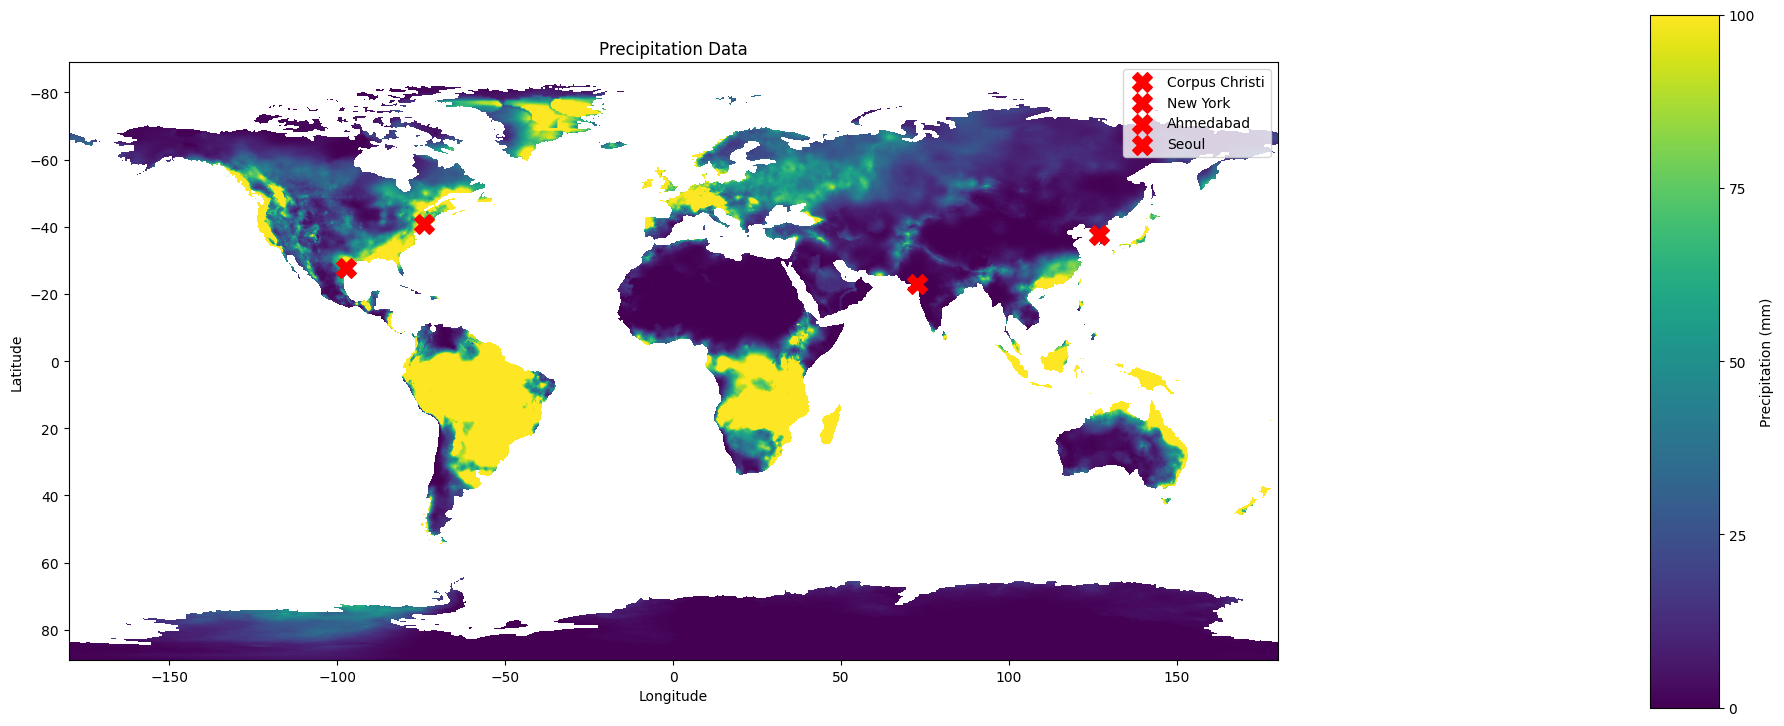

In [92]:
# Choose the time index you want to visualize (in this example, index 1)
time_index = 1

# Set specific latitude and longitude minimum and maximum values
lat_min = -89.0
lat_max = 89.0
lon_min = -180.0
lon_max = 180.0

# Create a bigger map with adjusted figsize
fig, ax = plt.subplots(figsize=(24, 18))

# Plot the precipitation data for the specific location with colorbar range
img=plt.imshow(precip['ppt'][time_index, :, :], cmap='viridis', origin='lower', extent=[lon_min, lon_max, lat_min, lat_max], vmin=0, vmax=100)
# Add colorbar with specific parameters
cbar_ticks = [0,25,50,75,100]
cbar = plt.colorbar(img,label='Precipitation (mm)', orientation="vertical", pad=0.2, aspect=10, shrink=0.5, ticks=cbar_ticks)

# Invert the y-axis
plt.gca().invert_yaxis()

# Scatter plot for the target locations
plt.scatter(corpus_christi_lon, -corpus_christi_lat, color='red', marker='X',s=200, label='Corpus Christi')
plt.scatter(new_york_lon, -new_york_lat, color='red', marker='X', s=200, label='New York')
plt.scatter(ahmedabad_lon, -ahmedabad_lat, color='red', marker='X',s=200, label='Ahmedabad')
plt.scatter(seoul_lon, -seoul_lat, color='red', marker='X',s=200, label='Seoul')

plt.xlabel('Longitude(°)')
plt.ylabel('Latitude(°)')
plt.title(f'Precipitation Data')


plt.legend()
plt.show()


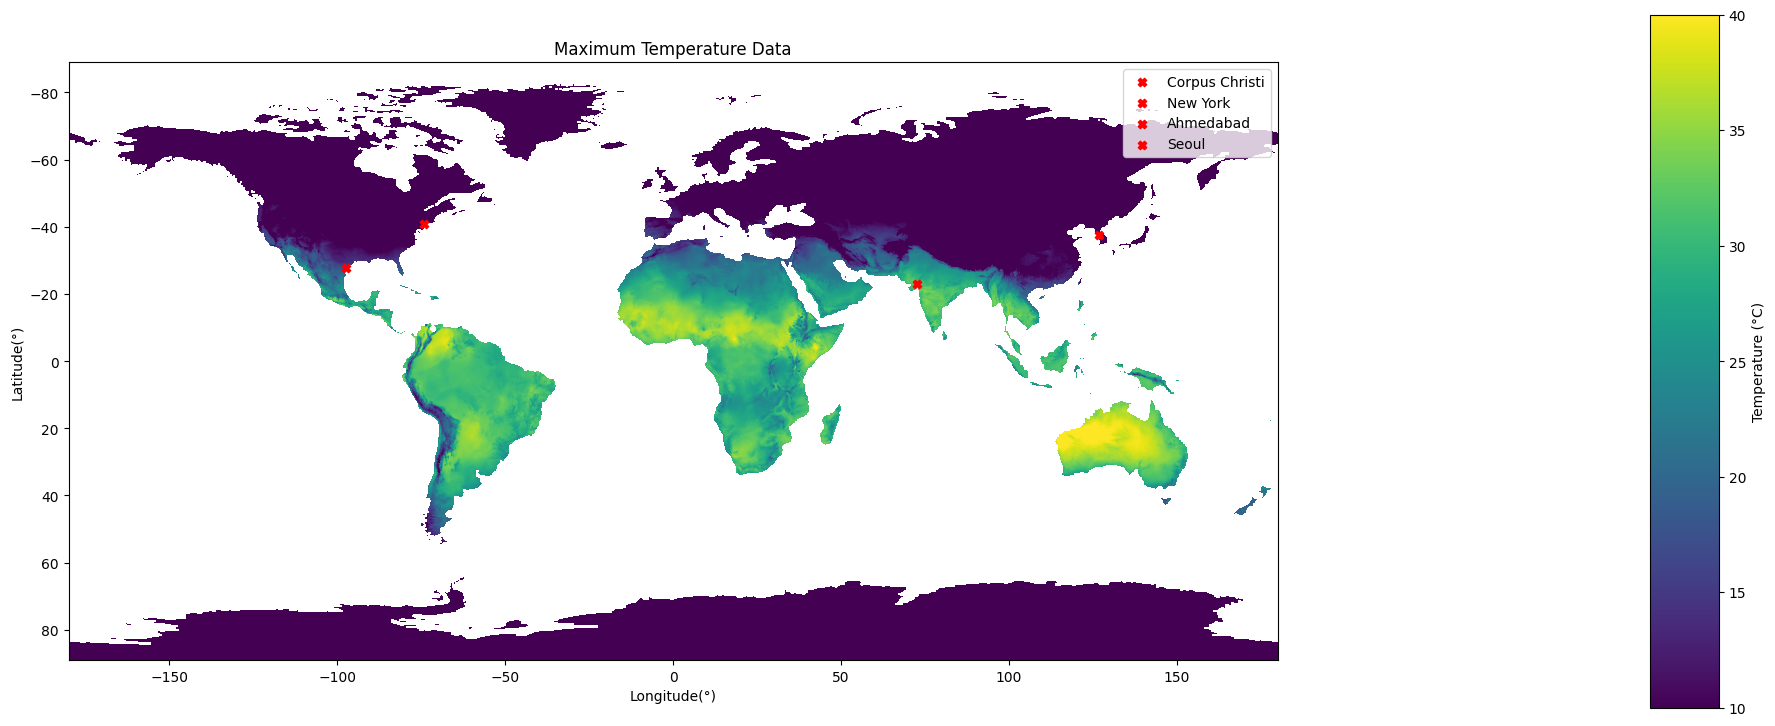

In [97]:
# Choose the time index you want to visualize (in this example, index 1)
time_index = 1

# Set specific latitude and longitude minimum and maximum values
lat_min = -89.0
lat_max = 89.0
lon_min = -180.0
lon_max = 180.0

# Create a bigger map with adjusted figsize
fig, ax = plt.subplots(figsize=(24, 18))

# Plot the precipitation data for the specific location with colorbar range
img=plt.imshow(tmax['tmax'][time_index, :, :], cmap='viridis', origin='lower', extent=[lon_min, lon_max, lat_min, lat_max], vmin=10, vmax=40)
# Add colorbar with specific parameters
cbar_ticks = [10,15,20,25,30,35,40]
cbar = plt.colorbar(img,label='Temperature (°C)', orientation="vertical", pad=0.2, aspect=10, shrink=0.5, ticks=cbar_ticks)

# Invert the y-axis
plt.gca().invert_yaxis()

# Scatter plot for the target locations
plt.scatter(corpus_christi_lon, -corpus_christi_lat, color='red', marker='X', label='Corpus Christi')
plt.scatter(new_york_lon, -new_york_lat, color='red', marker='X', label='New York')
plt.scatter(ahmedabad_lon, -ahmedabad_lat, color='red', marker='X', label='Ahmedabad')
plt.scatter(seoul_lon, -seoul_lat, color='red', marker='X', label='Seoul')

plt.xlabel('Longitude(°)')
plt.ylabel('Latitude(°)')
plt.title(f'Maximum Temperature Data')


plt.legend()
plt.show()


Plot time series for precipitation and minimum temperature for a single city side by side.

In [113]:
# Dictionary mapping variable abbreviations to full names
variable_names = {
    'ppt': 'Precipitation',
    'tmin': 'Minimum Temperature',
    'tmax': 'Maximum Temperature',
    'soil': 'Soil Moisture',
    'ws': 'Wind Speed',
}

def plot_time_series_subplot(weather_data, city_name, lat, lon, figsize=(15, 4), linewidth=0.6, fontsize=10):

    variables = ['ppt', 'tmax']
    num_plots = len(variables)

    plt.figure(figsize=figsize)

    for i, variable in enumerate(variables, start=1):
        plt.subplot(1, num_plots, i)

        # Select data for the specified variable, city, and location
        city_data = weather_data[variable].sel(lat=lat, lon=lon, method='nearest')[variable]


        plt.plot(city_data['time'], city_data, label=f'{variable_names.get(variable, variable.capitalize())}', linewidth=linewidth)

        plt.title(f'{variable_names.get(variable, variable.capitalize())} - {city_name}')
        plt.xlabel('Year')
        plt.ylabel(f'{variable_names.get(variable, variable.capitalize())} (mm)' if variable == 'ppt' else f'{variable_names.get(variable, variable.capitalize())} (°C)')
        plt.grid(True)


    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

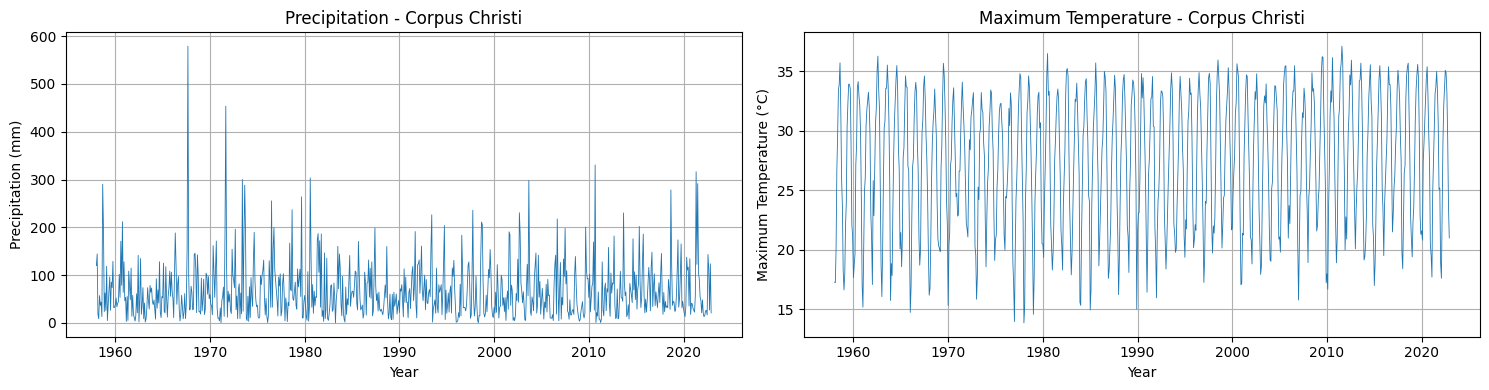

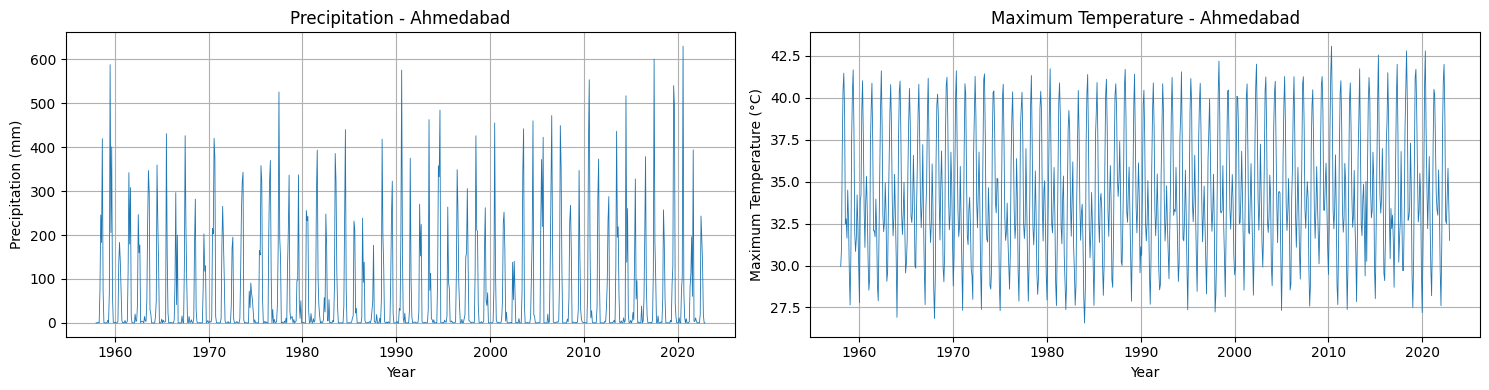

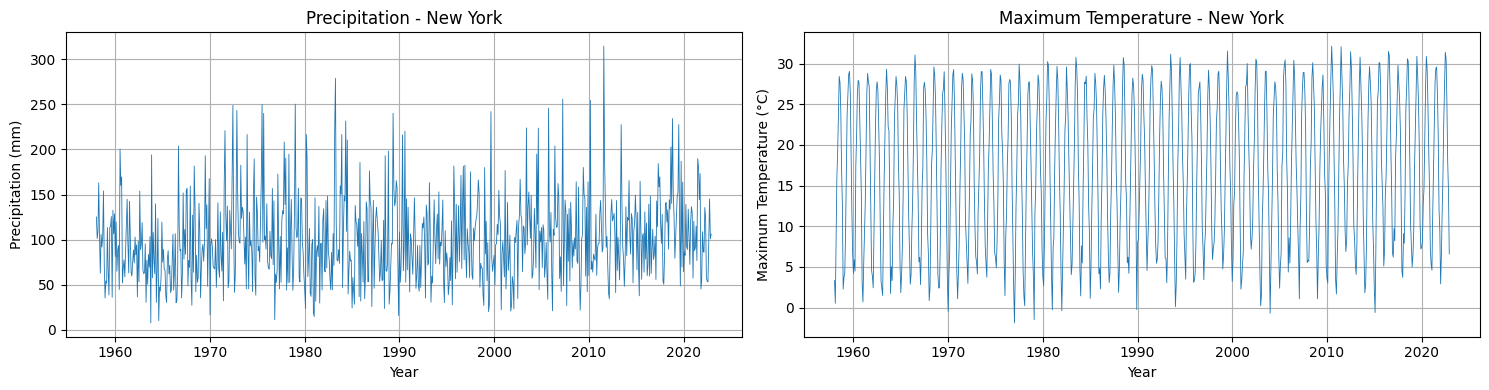

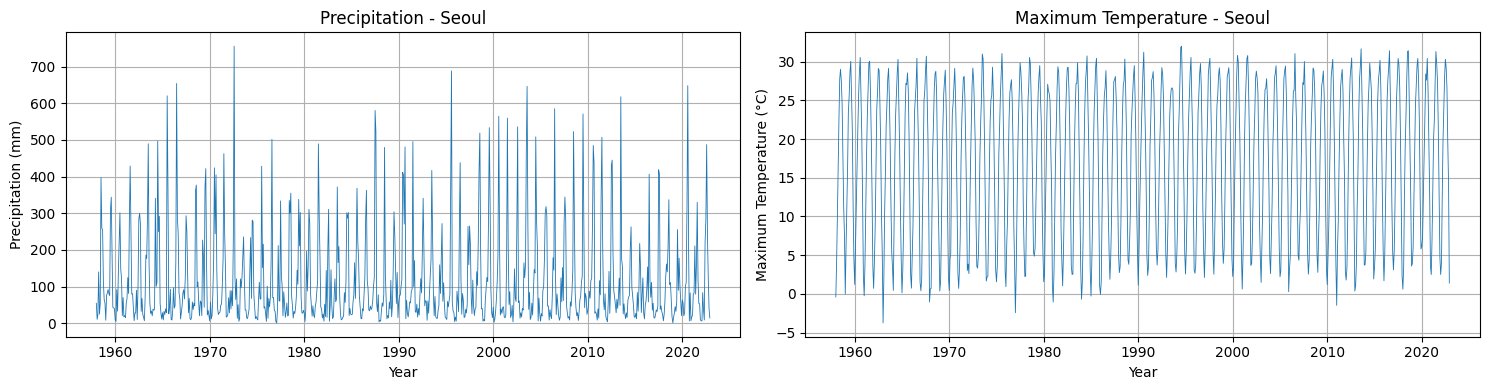

In [114]:
city_names = ['Corpus Christi', 'Ahmedabad', 'New York', 'Seoul']
latitudes = [27.8006, 23.0225, 40.7128, 37.5665]
longitudes = [-97.3964, 72.5714, -74.0060, 126.9780]

weather_data = {'tmax': tmax, 'ppt': precip}

for city_name, lat, lon in zip(city_names, latitudes, longitudes):
    plot_time_series_subplot(weather_data, city_name, lat, lon)


Plot time series for a specific variable and city.

In [115]:
def plot_time_series(weather_data, variable, city_name, lat, lon, figsize=(12, 6), linewidth=0.6, fontsize=10):

    # Select data for the specified variable, city, and location
    city_data = weather_data[variable].sel(lat=lat, lon=lon, method='nearest')


    plt.figure(figsize=figsize)
    plt.plot(city_data['time'], city_data, label=f'{variable_names.get(variable, variable.capitalize())} - {city_name}', color='blue', linewidth=linewidth)


    plt.title(f'{variable_names.get(variable, variable.capitalize())} - {city_name}')
    plt.xlabel('Year')
    plt.ylabel(f'{variable_names.get(variable, variable.capitalize())} (mm)' if variable in ['ppt', 'soil'] else (f'{variable_names.get(variable, variable.capitalize())} (°C)' if variable in ['tmin', 'tmax'] else f'{variable_names.get(variable, variable.capitalize())} (m/s)'))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

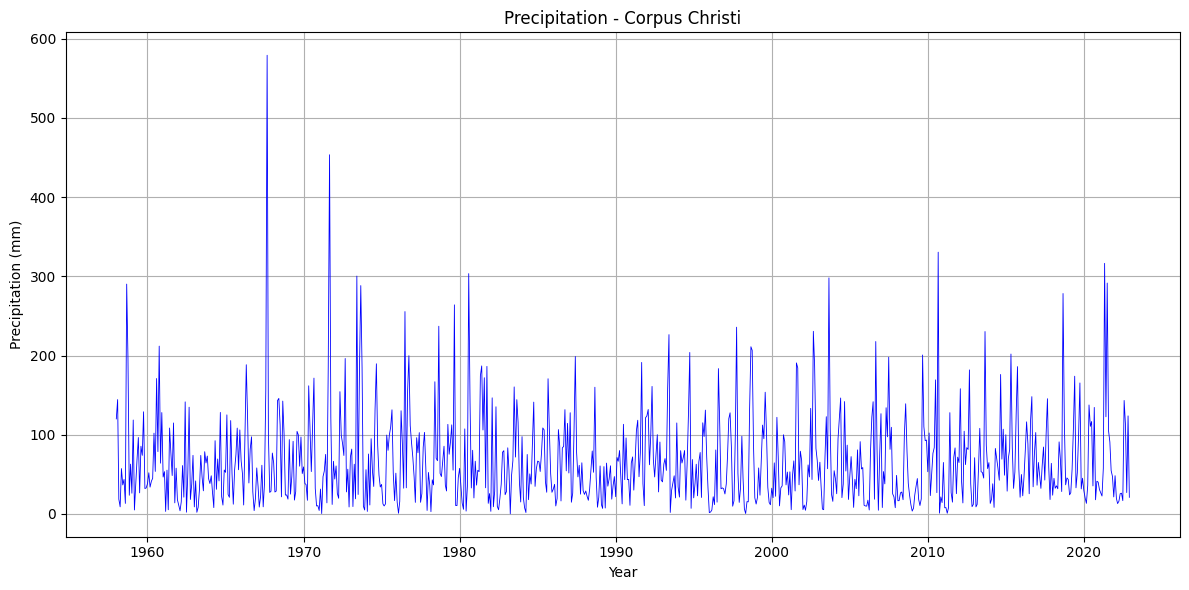

In [116]:
plot_time_series(precip, 'ppt', 'Corpus Christi', corpus_christi_lat, corpus_christi_lon)

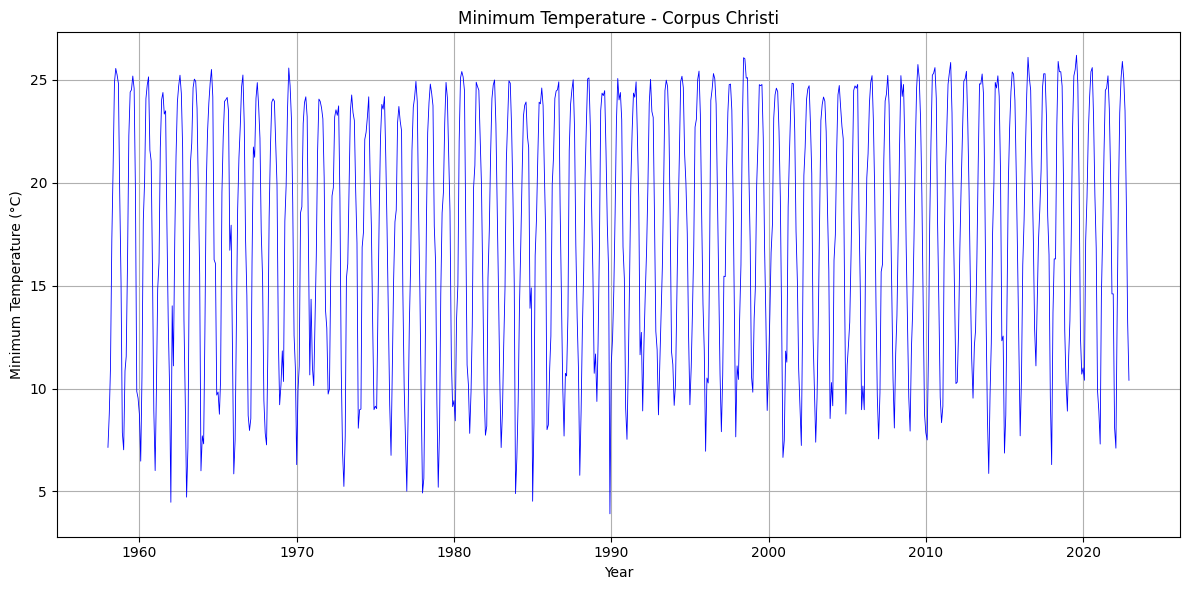

In [117]:
plot_time_series(tmin, 'tmin', 'Corpus Christi', corpus_christi_lat, corpus_christi_lon)

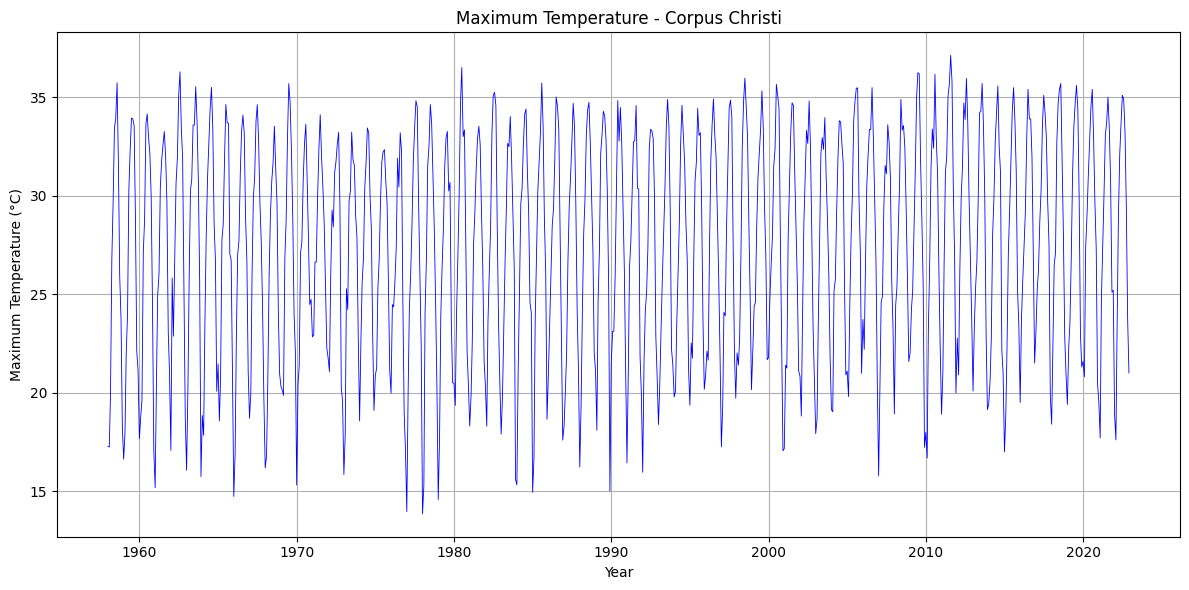

In [118]:
plot_time_series(tmax, 'tmax', 'Corpus Christi', corpus_christi_lat, corpus_christi_lon)

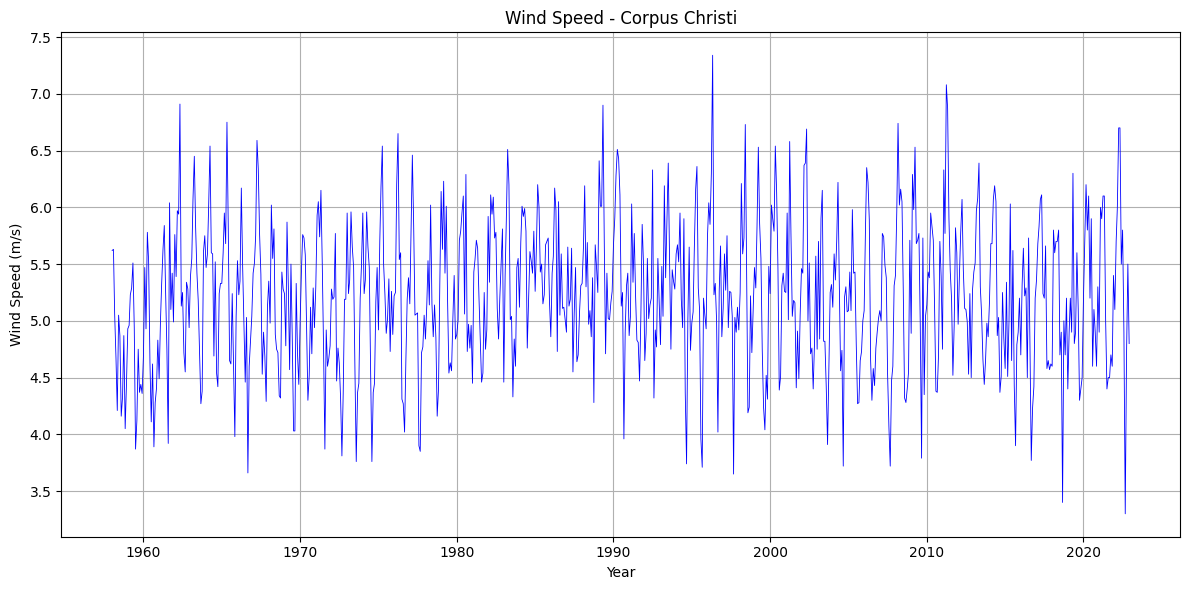

In [119]:
plot_time_series(wind_speed, 'ws', 'Corpus Christi', corpus_christi_lat, corpus_christi_lon)

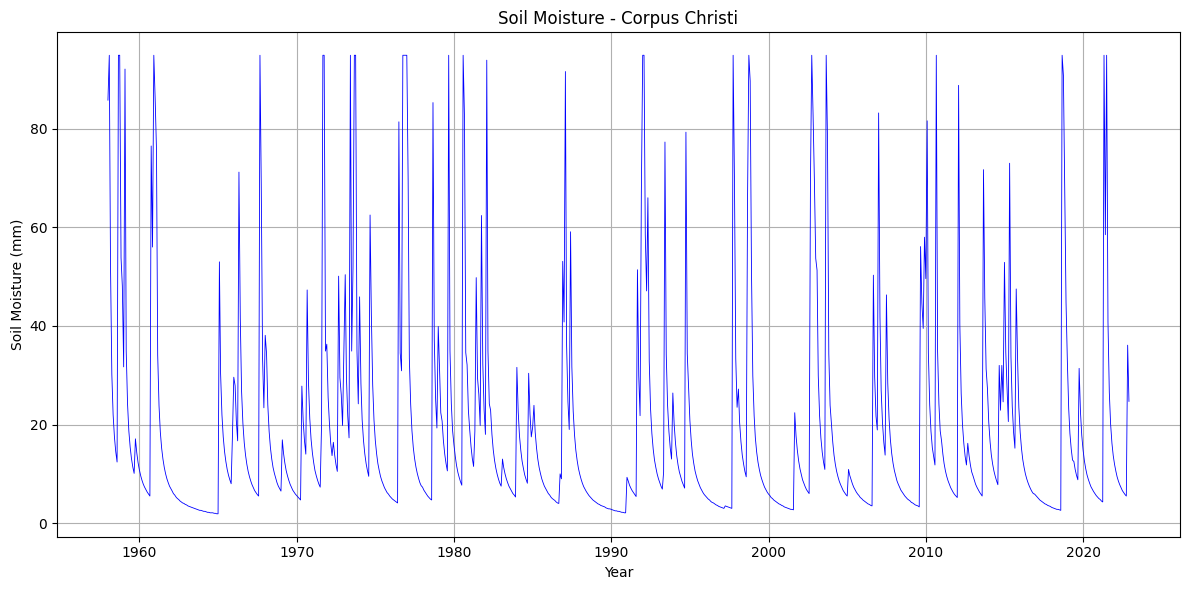

In [120]:
plot_time_series(soil_moist, 'soil', 'Corpus Christi', corpus_christi_lat, corpus_christi_lon)

Plot time series for minimum and maximum temperature in one graph for a single city.

In [136]:
def plot_temperature_subplot(weather_data, city_name, lat, lon, figsize=(10, 3), linewidth=0.6, fontsize=10):

    variables = ['tmin', 'tmax']

    plt.figure(figsize=figsize)

    for variable in variables:
        # Select data for the specified variable, city, and location
        city_data = weather_data[variable].sel(lat=lat, lon=lon, method='nearest').to_array().values.flatten()

        # Access the time information from the coordinates
        time_data = weather_data[variable].coords['time']

        # Plot for each variable using time on the y-axis
        plt.plot(time_data, city_data, label=f'{variable_names.get(variable, variable.capitalize())}', linewidth=linewidth)

    # Customize the plot
    plt.title(f'Temperature at {city_name}')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()




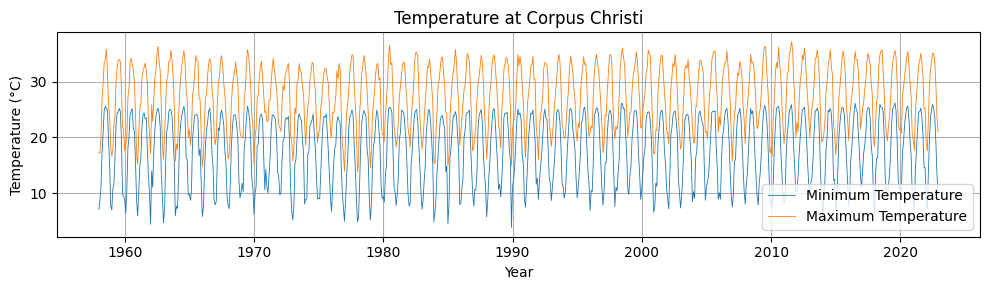

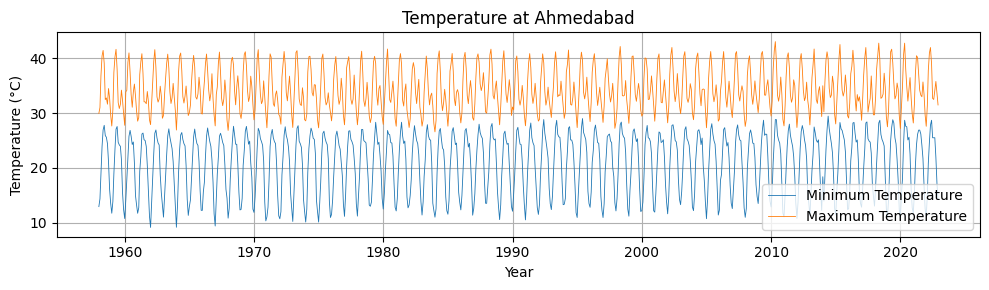

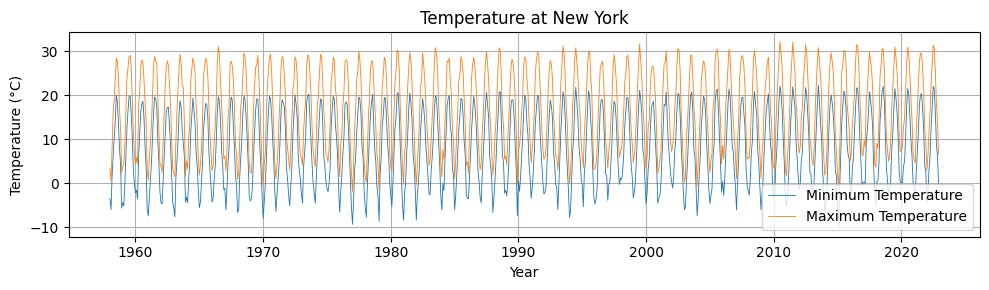

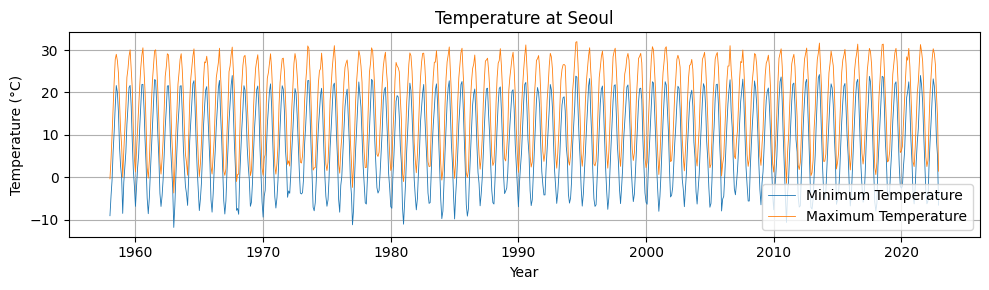

In [137]:
city_names = ['Corpus Christi', 'Ahmedabad', 'New York', 'Seoul']
latitudes = [27.8006, 23.0225, 40.7128, 37.5665]
longitudes = [-97.3964, 72.5714, -74.0060, 126.9780]
weather_data = {'tmin': tmin, 'tmax': tmax}

for city_name, lat, lon in zip(city_names, latitudes, longitudes):
    plot_temperature_subplot(weather_data, city_name, lat, lon)